# In which we use the [WayBack Machine](https://archive.org/web/) to scrape historical data on the number of signatures for the [Petition to Rescind Article 50 if Vote Leave Broke the Law](https://petition.parliament.uk/petitions/223729).
## Spoilers: People get really into it when it becomes brutally obvious that [Vote Leave did break the law](https://www.theguardian.com/politics/2018/jul/17/vote-leave-broke-electoral-law-and-british-democracy-is-shaken).

In [1]:
from datetime import datetime
import json
import string

from bs4 import BeautifulSoup
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import requests

## Rather helpfully, the WayBack Machine has an [API](https://github.com/internetarchive/wayback/tree/master/wayback-cdx-server).

In [2]:
def get_timestamps(url):
    req = requests.get('http://web.archive.org/cdx/search/cdx',
        params={'url':url,'output':'json'})
    return sorted(set([item[1] for item in req.json()[1:]]))

def extract_count(url,timestamp):
    req = requests.get('http://web.archive.org/web/{}/{}'.format(timestamp,url))
    soup = BeautifulSoup(req.content, 'html5lib')
    return int(''.join(filter(lambda c: c in string.digits,
        soup.find('span', class_='count').text)))

In [3]:
def get_counts(url):
    timestamps = get_timestamps(url)
    counts = map(lambda t: extract_count(url,t), timestamps)
    times = map(lambda t: datetime.strptime(t,'%Y%m%d%H%M%S'), timestamps)
    return list(times), list(counts)

## Try it with any [UK Parliament Petition](https://petition.parliament.uk/) you like:

In [4]:
rescind_art_50 = 'https://petition.parliament.uk/petitions/223729'

In [5]:
times, counts = get_counts(rescind_art_50)

## ~100K signatures were reached at 2100 18/07/18, we only get data points when the WayBack Machine takes a snapshot.

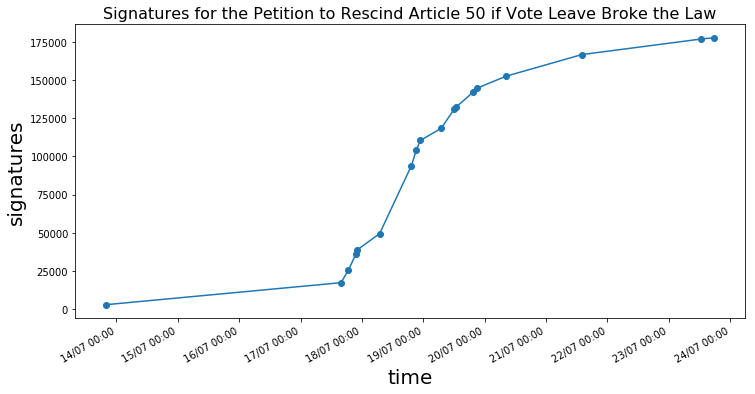

In [6]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.gcf().autofmt_xdate()
plt.xlabel('time', fontsize=20)
plt.ylabel('signatures', fontsize=20)
plt.title('Signatures for the Petition to Rescind Article 50 if Vote Leave Broke the Law',
    fontsize=16)
plt.plot(times,counts,  marker='o')

In [7]:
print(json.dumps(list(zip(map(lambda t: t.isoformat(),times),counts))))

[["2018-07-13T19:45:01", 2775], ["2018-07-17T15:48:45", 17219], ["2018-07-17T18:42:37", 25370], ["2018-07-17T21:38:14", 35911], ["2018-07-17T22:15:05", 38820], ["2018-07-18T06:56:07", 49418], ["2018-07-18T19:22:33", 94005], ["2018-07-18T21:16:23", 104136], ["2018-07-18T22:50:29", 110524], ["2018-07-19T06:58:55", 118385], ["2018-07-19T12:11:46", 131251], ["2018-07-19T12:48:44", 132367], ["2018-07-19T19:22:45", 141980], ["2018-07-19T21:04:42", 144840], ["2018-07-20T08:23:42", 152625], ["2018-07-21T13:58:56", 166790], ["2018-07-23T12:34:01", 176980], ["2018-07-23T17:45:49", 177881]]
